# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as scipy

## Reading the Data into a DataFrame

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ycwang15/PGP_DSBA/Data/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
df.shape

(100, 6)

In [6]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [8]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [9]:
df[df.duplicated()].count()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### There are 6 different features in this dataframe, datatype of each column is correct, and there is no duplicated rows, no missing values neither.

### Univariate Analysis & Bivariate Analysis

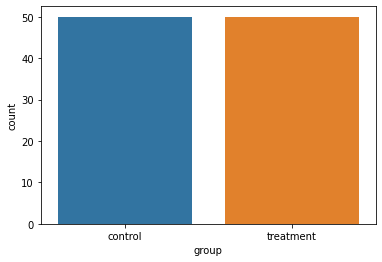

In [10]:
# the count of two different groups
sns.countplot(data=df, x='group');

#### people in two different groups are equal, each group has 50 people

In [11]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [12]:
df.groupby(by=['group'])['converted'].value_counts()

group      converted
control    no           29
           yes          21
treatment  yes          33
           no           17
Name: converted, dtype: int64

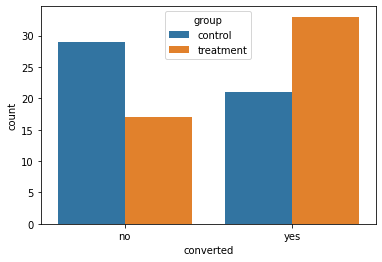

In [13]:
# the count of convert according two different groups
sns.countplot(data=df, x='converted', hue='group');

#### Obviously, from this bar chart we can see that people converted to subscribe was higher in treatment group than in control group

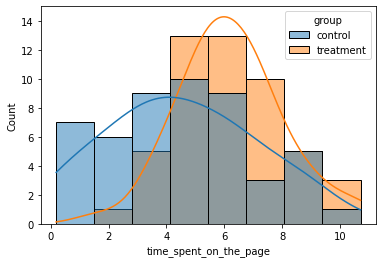

In [14]:
# the distribution of time spend on the page
sns.histplot(data=df, x='time_spent_on_the_page', hue='group',kde=True);

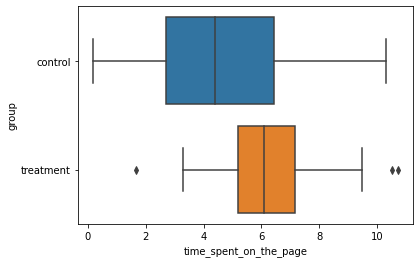

In [15]:
sns.boxplot(data=df,x='time_spent_on_the_page',y='group');

#### The distribution of time spending on the page is more likely a normal distribution for the people in new group.
#### Overview, people in treatment group spend more time on the page than the people in the control group.

In [16]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

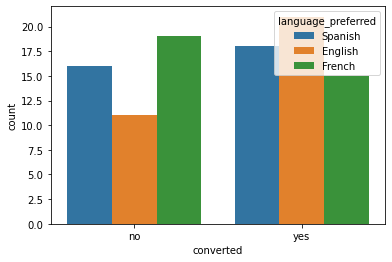

In [17]:
sns.countplot(data=df, x='converted', hue='language_preferred');

#### There are three different languages, nearly one-third weight of each language.
#### English speakers got the highest converted number, French speakers got the lowest converted number.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

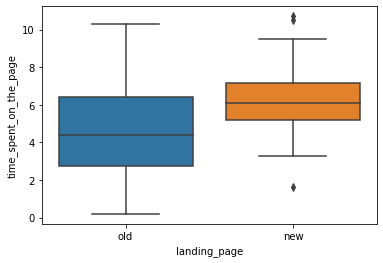

In [18]:
sns.boxplot(data=df,x='landing_page', y='time_spent_on_the_page');

### Step 1: Define the null and alternate hypotheses

#### H0: The time users spend on the new landing page = The time users spend on the existing landing page
#### Ha: The time users spend on the new landing page > The time users spend on the existing landing page

### Step 2: Select Appropriate test

#### Two sample; Two independent populations; Unequal population std dev (according to step 4)
#### So the Two Independent sample T-Test is the appropriate test for this hypothesis test.

### Step 3: Decide the significance level

#### alpha = 0.05

### Step 4: Collect and prepare data

In [19]:
old_group = df[df['group']=='control']
new_group = df[df['group']=='treatment']
print(old_group['time_spent_on_the_page'].std())
print(new_group['time_spent_on_the_page'].std())

2.581974849306046
1.8170310387878263


#### According to the Central Limit Theorem, when the sample size is greater than 30, the sample std can represent the population std, so the std of the population of these two different groups are not equal.

### Step 5: Calculate the p-value

In [20]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(new_group['time_spent_on_the_page'], 
                               old_group['time_spent_on_the_page'],
                               equal_var = False,
                              alternative = 'greater')
print('p-value is',p_value)

p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [21]:
if p_value < 0.05:
    print('We can reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We can reject the null hypothesis.


### Step 7:  Draw inference

#### Due to the p-value is less than 0.05, we can reject the null hypothesis, which means from the statistical point of view, people spend significantly more time on new pages than on old pages.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Establish the null and alternative hypothesis
#### H0: The conversion rate for the new page = The conversion rate for the old page
#### Ha: The conversion rate for the new page > The conversion rate for the old page

### The appropriate test
#### Binomially Distributed populations (YES / NO); Indenpendent Populations; np and n(1-p) greater than 10.
#### So the Two Proportion Z test is the appropriate test for this hypothesis testing. 

In [22]:
# check if np and n(1-p)greater than 10
n=50
p1=old_group.loc[old_group['converted']=='yes'].shape[0]/n
p2=new_group.loc[new_group['converted']=='yes'].shape[0]/n
if n*p1>10 and n*p2>10 and n*(1-p1)>10 and n*(1-p2)>10:
    print('Meets the assumption of the two proportions z test')
else:
    print("Doesn't meet the assumption of the two proportions z test")

Meets the assumption of the two proportions z test


### Calculate the p_value

In [23]:
count_yes = np.array([n*p2, n*p1])
total = np.array([n,n])

In [24]:
from statsmodels.stats.proportion import proportions_ztest
test_stat1, p_value1 = proportions_ztest(count_yes,total,value=0,alternative = 'larger')
print('p-value is',p_value1)

p-value is 0.008026308204056278


In [25]:
if p_value1< 0.05:
    print('We can reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We can reject the null hypothesis.


#### Due to the p-value is less than 0.05, we can reject the null hypothesis, which means from the statistical point of view, the conversion rate of the new page is greater than the conversion rate of the old page.

## 3. Is the conversion and preferred language are independent or related?

### Establish the null and alternative hypothesis
#### H0: Conversion and preferred language are independent
#### Ha: Conversion and preferred language are not independent

In [26]:
df_new = df[['converted','language_preferred']]
table = pd.crosstab(df_new['converted'], df_new['language_preferred'])
table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


#### We choose test of independence for this hypothesis testing

In [27]:
from scipy.stats import chi2_contingency
chi,p_value2,dof,expected = chi2_contingency(table)
print('p-value is',p_value2)

p-value is 0.21298887487543447


In [28]:
if p_value2< 0.05:
    print('We can reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


#### Due to the p_value is greater than the level of signficance, we can not reject the null hypothesis, which means conversion and preferred language are independent.

## 4. Is the time spent on the new page same for the different language users?

### Establish the null and alternative hypothesis
#### H0: Time spent on the new page are same for the different language users
#### Ha: At least one language are different with others for the time spent on the new page

In [29]:
new_group.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [30]:
df_anova = new_group[['time_spent_on_the_page','language_preferred']]
df1 = new_group.loc[new_group['language_preferred']=='English'][['time_spent_on_the_page','language_preferred']]
df2 = new_group.loc[new_group['language_preferred']=='Spanish'][['time_spent_on_the_page','language_preferred']]
df3 = new_group.loc[new_group['language_preferred']=='French'][['time_spent_on_the_page','language_preferred']]

#### For this hypothesis testing, because of we need to compare three different groups, we choose ANOVA test.

In [31]:
print(df1["time_spent_on_the_page"].mean(),df2["time_spent_on_the_page"].mean(),df3["time_spent_on_the_page"].mean())

6.6637499999999985 5.835294117647059 6.196470588235294


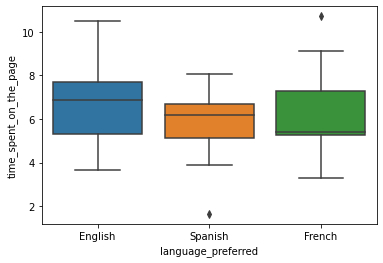

In [32]:
sns.boxplot(data=df_anova,x='language_preferred',y='time_spent_on_the_page');

### Shapiro-Wilk’s test
#### 𝐻0:  time_spend_on_the_page follows a normal distribution against
#### 𝐻𝑎:   time_spend_on_the_page does not follow a normal distribution

In [33]:
from scipy import stats
w, p_value3 = stats.shapiro(df_anova['time_spent_on_the_page']) 
print('The p-value is', p_value3)

The p-value is 0.8040016293525696


#### Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test
#### 𝐻0 : All the population variances are equal
#### 𝐻𝑎 : At least one variance is different from the rest

In [34]:
from scipy.stats import levene
statistic, p_value4 = levene(df1['time_spent_on_the_page'],
                           df2['time_spent_on_the_page'],
                           df3['time_spent_on_the_page'])
print('The p-value is', p_value4)

The p-value is 0.46711357711340173


#### Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Calculate P_Value

In [35]:
from scipy.stats import f_oneway

test_stat, p_value5 = f_oneway(df1['time_spent_on_the_page'],
                           df2['time_spent_on_the_page'],
                           df3['time_spent_on_the_page'])
print('The p-value is ' + str(p_value5))

The p-value is 0.43204138694325955


#### Since the p_value is great larger than the level of signficance, we fail to reject the null hypothesis, which means Time spent on the new page are same for the different language users

## Conclusion and Business Recommendations

### Conclusion
#### The new interface page is effective, it allows customers to spend significantly more time on the page, and customers spend significantly more time on the new page than customers on the old page.
#### At the same time, the subscription conversion rate of customers browsing the new page is significantly higher than the subscription conversion rate of browsing the old page
#### Subscription conversion rates are independent of preferred language
#### There is no significant difference in the average time spent browsing the new interface by customers who prefer different languages

### Recommendations
#### Replace old pages with new ones, market-oriented in exchange for higher subscription conversion rates
#### Preferred language is not an important indicator of subscription conversion rates, and designers may be able to remove this option.
#### In addition, the data only collects the continuous variable of time spent on the page, collecting more other continuous variables may allow for deeper research and more accurate results.

___